In [39]:
import pandas as pd
import numpy as np

In [40]:
# Read data from CSV
df = pd.read_csv('/Users/lakshitgupta/Downloads/Final_data.csv')

In [41]:
df.head(5)

,Entity,Code_x,Year,low_physical_activity,non_exclusive_breastfeeding,air_pollution,child_wasting,high_systolic_blood_pressure,high_fasting_plasma_glucose,child_stunting,...,vitamin_a_deficiency,ambient_particulate_matter_pollution,Code_y,substance_use_disorders,skin_and_subcutaneous_diseases,musculoskeletal_disorders,neoplasms,neurological_disorders,sense_organ_diseases,mental_disorders
0,Afghanistan,AFG,1990,61720.060,197049.34,1986290.4,1708694.4,663575.50,310177.80,670056.50,...,184149.10,143037.55,AFG,190.0,420.0,940.0,3270.0,1280.0,650.0,1700.0
1,Afghanistan,AFG,1991,62191.600,222485.78,2069430.0,1779057.6,670934.56,320839.94,687930.70,...,188899.77,148112.80,AFG,190.0,420.0,920.0,3130.0,1270.0,630.0,1730.0
2,Afghanistan,AFG,1992,63325.234,271585.20,2298508.2,2005481.5,685869.90,335451.56,748159.94,...,194698.05,163113.84,AFG,200.0,440.0,900.0,2980.0,1270.0,600.0,1790.0
3,Afghanistan,AFG,1993,64873.625,331279.28,2555748.2,2366581.0,705695.94,351943.25,862717.75,...,214913.90,180597.55,AFG,210.0,430.0,870.0,2840.0,1240.0,570.0,1780.0
4,Afghanistan,AFG,1994,66452.070,340745.12,2707120.0,2559192.2,725500.00,367981.28,963305.50,...,246066.05,190782.72,AFG,200.0,420.0,820.0,2700.0,1200.0,540.0,1710.0


In [42]:
df.columns

Index(['Entity', 'Code_x', 'Year', 'low_physical_activity',
       'non_exclusive_breastfeeding', 'air_pollution', 'child_wasting',
       'high_systolic_blood_pressure', 'high_fasting_plasma_glucose',
       'child_stunting', 'high_body_mass_index', 'secondhand_smoke',
       'unsafe_sanitation', 'unsafe_water_source', 'diet_low_in_vegetables',
       'diet_low_in_fruits', 'diet_high_in_sodium', 'drug_use',
       'household_air_pollution', 'high_ldl_cholesterol', 'iron_deficiency',
       'zinc_deficiency', 'smoking', 'vitamin_a_deficiency',
       'ambient_particulate_matter_pollution', 'Code_y',
       'substance_use_disorders', 'skin_and_subcutaneous_diseases',
       'musculoskeletal_disorders', 'neoplasms', 'neurological_disorders',
       'sense_organ_diseases', 'mental_disorders'],
      dtype='object')

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#### LSTM

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
features = [
    'low_physical_activity', 'non_exclusive_breastfeeding', 'air_pollution', 
    'child_wasting', 'high_systolic_blood_pressure', 'high_fasting_plasma_glucose', 
    'high_body_mass_index', 'secondhand_smoke', 'unsafe_sanitation', 'unsafe_water_source', 
    'diet_low_in_vegetables', 'diet_low_in_fruits', 'diet_high_in_sodium', 'drug_use', 
    'household_air_pollution', 'high_ldl_cholesterol', 'iron_deficiency', 'zinc_deficiency', 
    'smoking', 'vitamin_a_deficiency', 'ambient_particulate_matter_pollution', 
    'substance_use_disorders', 'skin_and_subcutaneous_diseases', 'musculoskeletal_disorders', 
    'neoplasms', 'neurological_disorders', 'sense_organ_diseases', 'child_stunting'
]
target = 'mental_disorders'

# Normalize the dataset
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[target] = scaler.fit_transform(df[[target]])


In [45]:
pca = PCA()  # Adjust the number of components as needed
df_pca = pca.fit_transform(df[features])

In [46]:
sequence_length = 5  # Number of previous time steps to use for prediction
X, y = [], []

for i in range(len(df_pca) - sequence_length):
    X.append(df_pca[i:i + sequence_length])
    y.append(df[target].iloc[i + sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [51]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(100))  # No return_sequences=True as this is the last LSTM layer
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(50, activation='relu'))  # Adding a dense layer with ReLU activation
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0378 - val_loss: 0.0112
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - val_loss: 0.0087
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - val_loss: 0.0072
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - val_loss: 0.0063
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - val_loss: 0.0072
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - val_loss: 0.0060
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - val_loss: 0.0074
Epoch 10/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 11/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - val_loss: 0.0072
Epoch 12/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [32]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error: 0.006231995625524038
R-squared: 0.7956376588286552


In [33]:
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {val_loss}')

Training Loss: 0.004868893884122372
Testing Loss: 0.006231996696442366


In [ ]:
### SVR

Mean Squared Error: 0.006495016967444801
R-squared: 0.7867769137612671


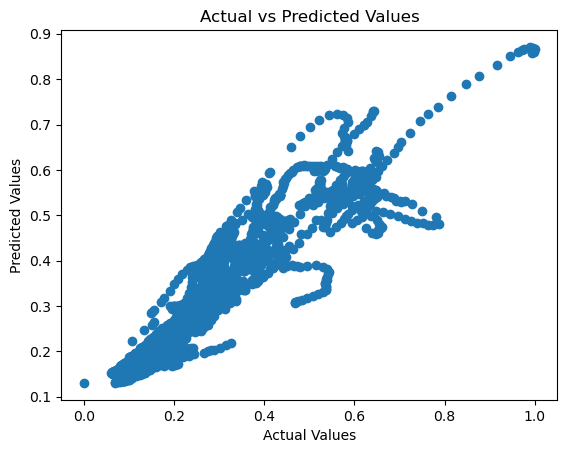

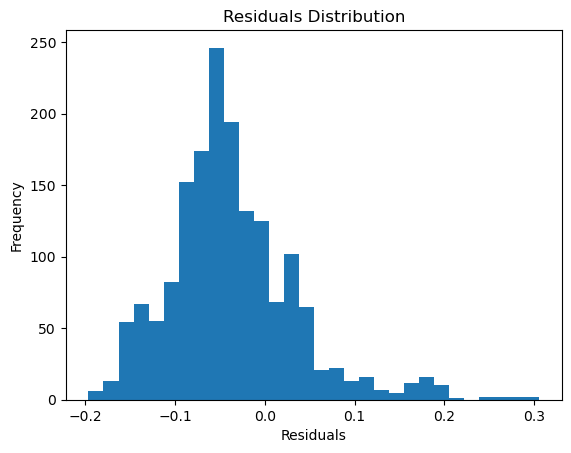

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features and target variable
features = [
    'low_physical_activity', 'non_exclusive_breastfeeding', 'air_pollution', 
    'child_wasting', 'high_systolic_blood_pressure', 'high_fasting_plasma_glucose', 
    'high_body_mass_index', 'secondhand_smoke', 'unsafe_sanitation', 'unsafe_water_source', 
    'diet_low_in_vegetables', 'diet_low_in_fruits', 'diet_high_in_sodium', 'drug_use', 
    'household_air_pollution', 'high_ldl_cholesterol', 'iron_deficiency', 'zinc_deficiency', 
    'smoking', 'vitamin_a_deficiency', 'ambient_particulate_matter_pollution', 
    'substance_use_disorders', 'skin_and_subcutaneous_diseases', 'musculoskeletal_disorders', 
    'neoplasms', 'neurological_disorders', 'sense_organ_diseases', 'child_stunting'
]
target = 'mental_disorders'

# Normalize the dataset
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[target] = scaler.fit_transform(df[[target]])

# Perform PCA on the features
pca = PCA()  # Adjust the number of components as needed
X_pca = pca.fit_transform(df[features])
y = df[target].values.ravel()  # Flatten the target array

# Split the data into training and testing sets
train_size = int(len(X_pca) * 0.7)
X_train, X_test = X_pca[:train_size], X_pca[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Model Building: SVR with RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Model Evaluation
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

In [ ]:
#### Random Forest

max_features=1 - Mean Squared Error: 0.004675037159524085, R-squared: 0.8465245192690166
max_features=2 - Mean Squared Error: 0.004462834662315012, R-squared: 0.8534908553985872
max_features=5 - Mean Squared Error: 0.004295817501698329, R-squared: 0.8589738148150164
max_features=7 - Mean Squared Error: 0.004389836371112571, R-squared: 0.8558872957802451
max_features=10 - Mean Squared Error: 0.004804098921924894, R-squared: 0.842287586951142
max_features=15 - Mean Squared Error: 0.004804098921924894, R-squared: 0.842287586951142


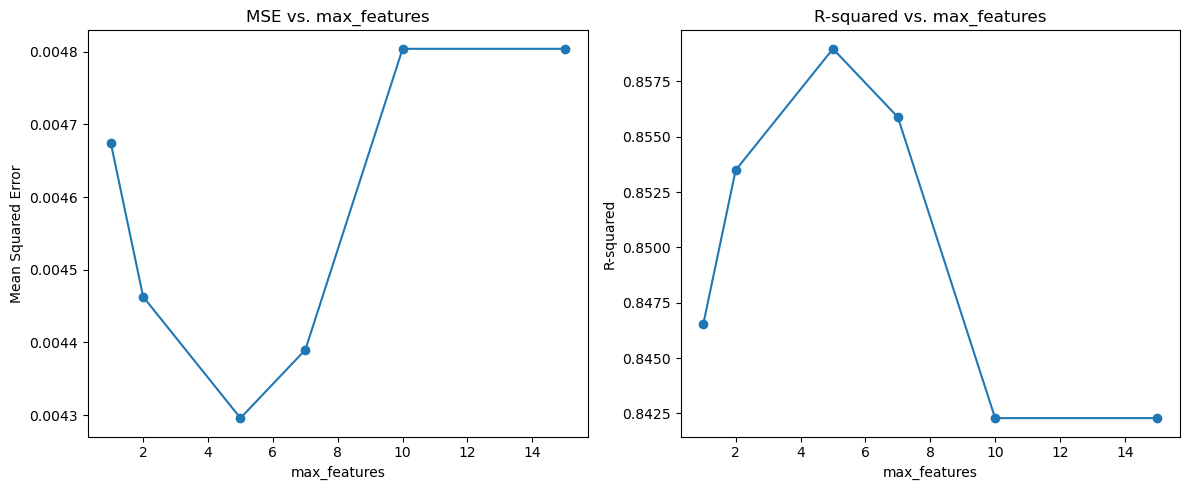

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features and target variable
features = [
    'low_physical_activity', 'non_exclusive_breastfeeding', 'air_pollution', 
    'child_wasting', 'high_systolic_blood_pressure', 'high_fasting_plasma_glucose', 
    'high_body_mass_index', 'secondhand_smoke', 'unsafe_sanitation', 'unsafe_water_source', 
    'diet_low_in_vegetables', 'diet_low_in_fruits', 'diet_high_in_sodium', 'drug_use', 
    'household_air_pollution', 'high_ldl_cholesterol', 'iron_deficiency', 'zinc_deficiency', 
    'smoking', 'vitamin_a_deficiency', 'ambient_particulate_matter_pollution', 
    'substance_use_disorders', 'skin_and_subcutaneous_diseases', 'musculoskeletal_disorders', 
    'neoplasms', 'neurological_disorders', 'sense_organ_diseases', 'child_stunting'
]
target = 'mental_disorders'

# Normalize the dataset
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[target] = scaler.fit_transform(df[[target]])

# Perform PCA on the features
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_pca = pca.fit_transform(df[features])
y = df[target].values.ravel()  # Flatten the target array

# Split the data into training and testing sets
train_size = int(len(X_pca) * 0.7)
X_train, X_test = X_pca[:train_size], X_pca[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Function to train and evaluate Random Forest with different max_features
def evaluate_random_forest(max_features_values):
    results = []
    for max_features in max_features_values:
        rf_model = RandomForestRegressor(max_features=max_features, random_state=42)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append((max_features, mse, r2))
        print(f'max_features={max_features} - Mean Squared Error: {mse}, R-squared: {r2}')
    return results

# Evaluate Random Forest with different max_features values
max_features_values = [1, 2, 5, 7, 10,15]  # Different values for max_features
results = evaluate_random_forest(max_features_values)

# Plotting results
max_features, mse_values, r2_values = zip(*results)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(max_features, mse_values, marker='o')
plt.xlabel('max_features')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. max_features')

plt.subplot(1, 2, 2)
plt.plot(max_features, r2_values, marker='o')
plt.xlabel('max_features')
plt.ylabel('R-squared')
plt.title('R-squared vs. max_features')

plt.tight_layout()
plt.show()


# LSTM

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout

## LSTM (Taking the target variable as mental disorder)

In [19]:
# Selecting relevant features and target variable
features = [
    'low_physical_activity', 'non_exclusive_breastfeeding', 'air_pollution', 
    'child_wasting', 'high_systolic_blood_pressure', 'high_fasting_plasma_glucose', 
    'high_body_mass_index', 'secondhand_smoke', 'unsafe_sanitation', 'unsafe_water_source', 
    'diet_low_in_vegetables', 'diet_low_in_fruits', 'diet_high_in_sodium', 'drug_use', 
    'household_air_pollution', 'high_ldl_cholesterol', 'iron_deficiency', 'zinc_deficiency', 
    'smoking', 'vitamin_a_deficiency', 'ambient_particulate_matter_pollution', 
    'substance_use_disorders', 'skin_and_subcutaneous_diseases', 'musculoskeletal_disorders', 
    'neoplasms', 'neurological_disorders', 'sense_organ_diseases', 'child_stunting'
]

target = 'mental_disorders'

In [20]:
# Normalize the dataset
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[target] = scaler.fit_transform(df[[target]])

In [21]:
# Prepare the data for LSTM
sequence_length = 5  # Number of previous time steps to use for prediction
X, y = [], []

for i in range(len(df) - sequence_length):
    X.append(df[features].iloc[i:i + sequence_length].values)
    y.append(df[target].iloc[i + sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [22]:
# Step 2: Model Building
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\akotwani\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Step 3: Model Training
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0376 - val_loss: 0.0122
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - val_loss: 0.0117
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - val_loss: 0.0101
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083 - val_loss: 0.0086
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0068 - val_loss: 0.0075
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - val_loss: 0.0081
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0061 - val_loss: 0.0065
Epoch 10/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - val_loss: 0.0065
Epoch 11/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 12/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

In [24]:
# Step 4: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Mean Squared Error: 0.007864294013532362
R-squared: 0.7421106122599177


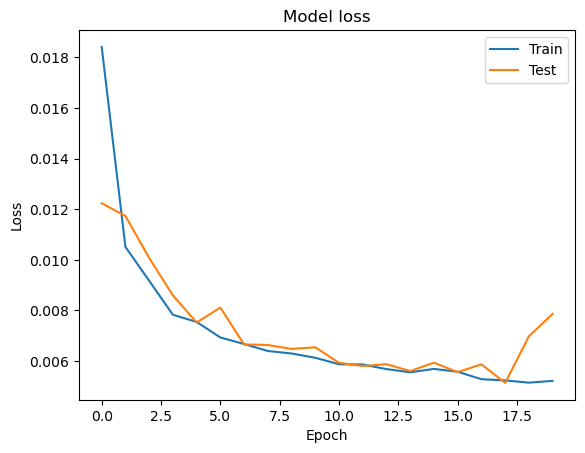

In [25]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [26]:
# Calculate training and testing accuracy (loss)
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {val_loss}')

Training Loss: 0.0052180164493620396
Testing Loss: 0.007864294573664665


## LSTM (increasing the layers and making it more complex)

In [32]:
# Selecting relevant features and target variable
features = [
    'low_physical_activity', 'non_exclusive_breastfeeding', 'air_pollution', 
    'child_wasting', 'high_systolic_blood_pressure', 'high_fasting_plasma_glucose', 
    'high_body_mass_index', 'secondhand_smoke', 'unsafe_sanitation', 'unsafe_water_source', 
    'diet_low_in_vegetables', 'diet_low_in_fruits', 'diet_high_in_sodium', 'drug_use', 
    'household_air_pollution', 'high_ldl_cholesterol', 'iron_deficiency', 'zinc_deficiency', 
    'smoking', 'vitamin_a_deficiency', 'ambient_particulate_matter_pollution', 
    'substance_use_disorders', 'skin_and_subcutaneous_diseases', 'musculoskeletal_disorders', 
    'neoplasms', 'neurological_disorders', 'sense_organ_diseases', 'child_stunting'
]

target = 'mental_disorders'

In [33]:
# Normalize the dataset
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[target] = scaler.fit_transform(df[[target]])

In [34]:
# Prepare the data for LSTM
sequence_length = 5  # Number of previous time steps to use for prediction
X, y = [], []

for i in range(len(df) - sequence_length):
    X.append(df[features].iloc[i:i + sequence_length].values)
    y.append(df[target].iloc[i + sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [37]:
# Step 2: Model Building
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(100))  # No return_sequences=True as this is the last LSTM layer
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(50, activation='relu'))  # Adding a dense layer with ReLU activation
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
# Step 3: Model Training
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0367 - val_loss: 0.0128
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0131 - val_loss: 0.0113
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0111 - val_loss: 0.0095
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0089 - val_loss: 0.0072
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0072 - val_loss: 0.0059
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0068 - val_loss: 0.0056
Epoch 10/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0065 - val_loss: 0.0056
Epoch 11/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 12/20
122/122 ━━━━━━━━━━━━━━━━━━━━

In [39]:
# Step 4: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Mean Squared Error: 0.006614129750896393
R-squared: 0.7831065485398876


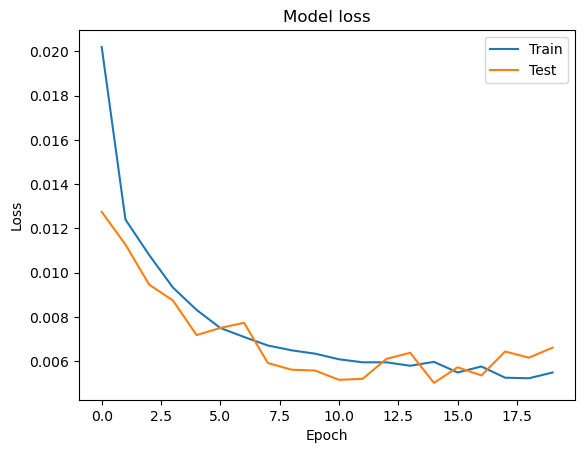

In [40]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [41]:
# Calculate training and testing accuracy (loss)
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {val_loss}')

Training Loss: 0.0054899598471820354
Testing Loss: 0.006614129524677992


## SVR

Mean Squared Error: 0.005461019718463265
R-squared: 0.8207217187856855


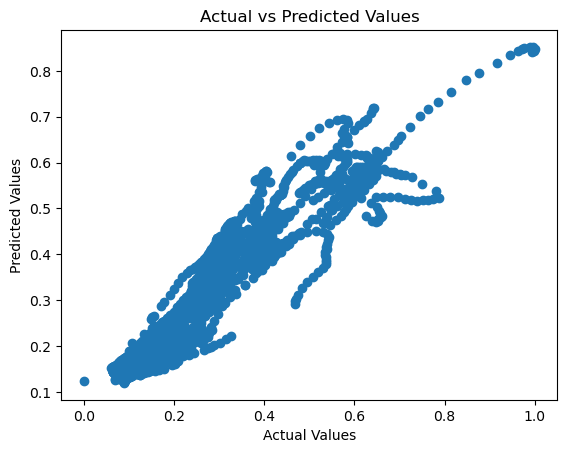

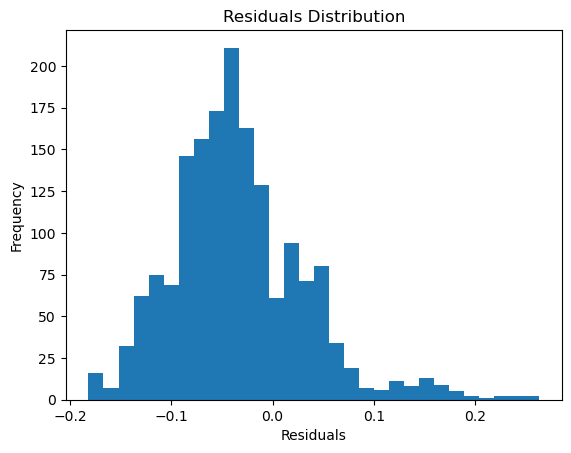

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Selecting relevant features and target variable
features = [
    'low_physical_activity', 'non_exclusive_breastfeeding', 'air_pollution', 
    'child_wasting', 'high_systolic_blood_pressure', 'high_fasting_plasma_glucose', 
    'high_body_mass_index', 'secondhand_smoke', 'unsafe_sanitation', 'unsafe_water_source', 
    'diet_low_in_vegetables', 'diet_low_in_fruits', 'diet_high_in_sodium', 'drug_use', 
    'household_air_pollution', 'high_ldl_cholesterol', 'iron_deficiency', 'zinc_deficiency', 
    'smoking', 'vitamin_a_deficiency', 'ambient_particulate_matter_pollution', 
    'substance_use_disorders', 'skin_and_subcutaneous_diseases', 'musculoskeletal_disorders', 
    'neoplasms', 'neurological_disorders', 'sense_organ_diseases', 'child_stunting'
]

target = 'mental_disorders'

# Normalize the dataset
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[target] = scaler.fit_transform(df[[target]])

# Prepare the data for SVR
X = df[features].values
y = df[target].values.ravel()  # Flatten the target array

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Model Building: SVR with RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Model Evaluation
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()
